In [44]:
from openalea.lpy import *
from pgljupyter import LsystemWidget
import matplotlib.pyplot as plt

In [45]:
from math import exp

def growth_logistic(ttime, finalsize, tip, b):
    return finalsize / (1 + exp(-(ttime-tip)/b ))


In [46]:
# Parameters
tip_leaf = 100.
b_leaf = 20.
finalsize_leaf = 25.

tip_internode = 60.
b_internode = 20.
finalsize_internode = 5.

dt = 10

def leaf_size(ttime):
    return  growth_logistic(ttime, finalsize_leaf, tip_leaf, b_leaf)

def internode_size(ttime):
    return  growth_logistic(ttime, finalsize_internode, tip_internode, b_internode)


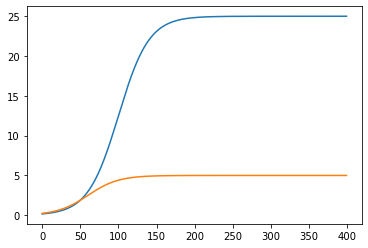

In [47]:
a = range(0,400)
plt.plot(a,list(map(leaf_size,a)))
plt.plot(a,list(map(internode_size,a)))
plt.show()

In [48]:
# %%lpy
code = """
Axiom: A(0)
production:
A(t):
    if t > 200:
        nproduce I(0)
        nproduce [L(0)A(-1000)]
        nproduce /(137) A(0)
    else:
        produce A(t+dt)

I(t) --> I(t+dt)
L(t) --> L(t+dt)

interpretation:
I(t) --> F(internode_size(t))
L(t) --> ^(t*0.4)~l(leaf_size(t))
"""

In [49]:
lw = LsystemWidget(Lsystem(code), unit='dm', animate=True)

ValueError: '
Axiom: A(0)
production:
A(t):
    if t > 200:
        nproduce I(0)
        nproduce [L(0)A(-1000)]
        nproduce /(137) A(0)
    else:
        produce A(t+dt)

I(t) --> I(t+dt)
L(t) --> L(t+dt)

interpretation:
I(t) --> F(internode_size(t))
L(t) --> ^(t*0.4)~l(leaf_size(t))
': No such file or directory.